In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_df["class"] = 0
true_df["class"] = 1

In [5]:
fake_df_manual_testing = fake_df.tail(10)
for i in range(23480,23470,-1):
    fake_df.drop([i], axis=0, inplace = True)
    
true_df_manual_testing = true_df.tail(10)
for i in range(21416,21406,-1):
    true_df.drop([i], axis=0, inplace = True)

In [6]:
fake_df_manual_testing['class'] = 0
true_df_manual_testing['class'] = 1

C:\Users\akash\AppData\Local\Temp\ipykernel_16680\1573991052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df_manual_testing['class'] = 0
C:\Users\akash\AppData\Local\Temp\ipykernel_16680\1573991052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_df_manual_testing['class'] = 1


In [7]:
fake_df_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [8]:
true_df_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [9]:
data_merge = pd.concat([fake_df, true_df], axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [10]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [11]:
data = data_merge.drop(['title','subject','date'], axis=1)

In [12]:
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [13]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [14]:
data = data.sample(frac=1)

In [15]:
data.head()

,text,class
4048,"Donald Trump, increasingly desperate as the el...",0
18385,(Reuters) - The death toll in Puerto Rico from...,1
12059,Kellyanne Conway s response to Williams criti...,0
17722,When comedian Andy Dick repeatedly slid his ...,0
18680,WASHINGTON (Reuters) - The U.S. led coalition ...,1


In [16]:
data.reset_index(inplace = True)
data.drop(['index'],axis=1, inplace=True)

In [17]:
data.columns

Index(['text', 'class'], dtype='object')

In [18]:
data.head()

,text,class
0,"Donald Trump, increasingly desperate as the el...",0
1,(Reuters) - The death toll in Puerto Rico from...,1
2,Kellyanne Conway s response to Williams criti...,0
3,When comedian Andy Dick repeatedly slid his ...,0
4,WASHINGTON (Reuters) - The U.S. led coalition ...,1


## Text Preprocessing

This Python function `preprocess_text` performs text preprocessing tasks on the input text data. Here's a breakdown of the steps:

1. **Convert Text to Lowercase:**
   - Converts all characters in the text to lowercase using the `lower()` method.

2. **Remove Square Brackets and Their Contents:**
   - Uses regular expression (`re`) to remove square brackets and any text within them.

3. **Remove Non-Alphanumeric Characters:**
   - Utilizes a list comprehension to keep only alphanumeric characters and whitespaces.

4. **Remove URLs:**
   - Uses regular expression (`re`) to remove URLs starting with "http" or "https" as well as URLs starting with "www".

5. **Remove XML/HTML Tags:**
   - Employs regular expression (`re`) to remove any XML/HTML tags (i.e., text within `<` and `>`).

6. **Remove Punctuation:**
   - Removes all punctuation characters using the `string.punctuation` constant.

7. **Tokenize the Text:**
   - Splits the text into tokens using `word_tokenize` from the `nltk.tokenize` module.

8. **Remove Stop Words:**
   - Removes common English stop words using the `stopwords` corpus from the `nltk.corpus` module.

9. **Remove Words Containing Digits:**
   - Filters out words containing digits using a list comprehension with `isdigit()`.

10. **Lemmatize Tokens:**
    - Lemmatizes the tokens using the WordNet lemmatizer from the `nltk.stem` module.

11. **Join Tokens Back Into a Single String:**
    - Joins the processed tokens back into a single string using `' '.join(tokens)`.

12. **Return Processed Text:**
    - Returns the preprocessed text.

Finally, the function is applied to the 'text' column of a DataFrame named `data` using the `apply` method, and the result is stored back into the 'text' column.


In [19]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove square brackets and their contents
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove non-alphanumeric characters
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove XML/HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation
    text = ''.join(char for char in text if char not in string.punctuation)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Remove words containing digits
    tokens = [word for word in tokens if not any(c.isdigit() for c in word)]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    
    return text

data['text'] = data['text'].apply(preprocess_text)
data.head()


,text,class
0,donald trump increasingly desperate as the ele...,0
1,reuters the death toll in puerto rico from hu...,1
2,kellyanne conway s response to williams criti...,0
3,when comedian andy dick repeatedly slid his ...,0
4,washington reuters the us led coalition fight...,1


## Setting up for Machine Learning

This code segment accomplishes the following tasks for preparing data for a machine learning model:

1. **Assign Variables:**
   - `x`: Assigns the values from the 'text' column of the DataFrame `data` to the variable `x`.
   - `y`: Assigns the values from the 'class' column of the DataFrame `data` to the variable `y`.

2. **Split Data:**
   - `train_test_split`: Splits the data into training and testing sets.
   - `x_train` and `y_train`: Store the features and labels for the training set, respectively.
   - `x_test` and `y_test`: Store the features and labels for the testing set, respectively.
   - `test_size=0.25`: Specifies that 25% of the data should be allocated for the testing set, while the remaining 75% will be used for training.


In [20]:
x=data['text']
y=data['class']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

## Text Vectorization using TF-IDF vectorisation

This code snippet performs text vectorization using the TF-IDF (Term Frequency-Inverse Document Frequency) technique with the `TfidfVectorizer` class from the `sklearn.feature_extraction.text` module.

1. **Import TfidfVectorizer:**
   - Imports the `TfidfVectorizer` class from the `sklearn.feature_extraction.text` module.

2. **Instantiate TfidfVectorizer:**
   - `vectorization = TfidfVectorizer()`: Instantiates a TF-IDF vectorizer object named `vectorization`. This object will be used to convert text data into TF-IDF vectors.

3. **Transform Training Data:**
   - `xv_train = vectorization.fit_transform(x_train)`: Fits the vectorizer (`vectorization`) to the training data (`x_train`) and transforms it into a TF-IDF matrix. This step calculates the TF-IDF values for each term in the training data.

4. **Transform Testing Data:**
   - `xv_test = vectorization.transform(x_test)`: Uses the fitted vectorizer (`vectorization`) to transform the testing data (`x_test`) into a TF-IDF matrix. This step applies the same transformation learned from the training data to the testing data, ensuring consistency in feature representation.

The TF-IDF vectorization process converts text data into numerical representations suitable for machine learning algorithms, where each document (text) is represented as a vector of TF-IDF values for individual terms.


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)



## Logistic Regression Model

This code segment involves training a Logistic Regression model using the TF-IDF vectors obtained from the text data.

1. **Import LogisticRegression:**
   - Imports the `LogisticRegression` class from the `sklearn.linear_model` module.

2. **Instantiate Logistic Regression Model:**
   - `LR_model = LogisticRegression()`: Instantiates a Logistic Regression model object named `LR_model`.

3. **Fit Model to Training Data:**
   - `LR_model.fit(xv_train, y_train)`: Fits the Logistic Regression model (`LR_model`) to the TF-IDF transformed training data (`xv_train`) along with their corresponding labels (`y_train`). This step trains the model to learn the relationship between the features and the target classes.

4. **Make Predictions:**
   - `pred_lr = LR_model.predict(xv_test)`: Uses the trained Logistic Regression model (`LR_model`) to make predictions on the TF-IDF transformed testing data (`xv_test`). The predicted labels are stored in the variable `pred_lr`.

5. **Model Evaluation:**
   - `LR_model.score(xv_test, y_test)`: Calculates the accuracy score of the Logistic Regression model on the testing data (`xv_test`) and their corresponding true labels (`y_test`).

6. **Print Classification Report:**
   - `print(classification_report(y_test, pred_lr))`: Prints a classification report which includes precision, recall, F1-score, and support for each class, based on the true labels (`y_test`) and the predicted labels (`pred_lr`). This report provides a comprehensive evaluation of the model's performance on the testing data.

This code demonstrates the process of training a Logistic Regression model, making predictions, evaluating its performance, and printing a classification report to assess its effectiveness in classifying text data.


In [23]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(xv_train, y_train)

LogisticRegression()

In [24]:
pred_lr = LR_model.predict(xv_test)
LR_model.score(xv_test, y_test)

0.989572192513369

In [25]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5889
           1       0.99      0.99      0.99      5331

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Decision Tree Classifier

This code block involves training a Decision Tree classifier using the TF-IDF vectors obtained from the text data.

1. **Import DecisionTreeClassifier:**
   - Imports the `DecisionTreeClassifier` class from the `sklearn.tree` module.

2. **Instantiate Decision Tree Classifier:**
   - `DT_model = DecisionTreeClassifier()`: Instantiates a Decision Tree classifier object named `DT_model`.

3. **Fit Model to Training Data:**
   - `DT_model.fit(xv_train, y_train)`: Fits the Decision Tree classifier (`DT_model`) to the TF-IDF transformed training data (`xv_train`) along with their corresponding labels (`y_train`). This step trains the model to learn the patterns in the feature-label relationship.

4. **Make Predictions:**
   - `pred_dt = DT_model.predict(xv_test)`: Uses the trained Decision Tree classifier (`DT_model`) to make predictions on the TF-IDF transformed testing data (`xv_test`). The predicted labels are stored in the variable `pred_dt`.

5. **Model Evaluation:**
   - `DT_model.score(xv_test, y_test)`: Calculates the accuracy score of the Decision Tree classifier on the testing data (`xv_test`) and their corresponding true labels (`y_test`).

6. **Print Classification Report:**
   - `print(classification_report(y_test, pred_dt))`: Prints a classification report which includes precision, recall, F1-score, and support for each class, based on the true labels (`y_test`) and the predicted labels (`pred_dt`). This report provides a comprehensive evaluation of the model's performance on the testing data.

This code demonstrates the process of training a Decision Tree classifier, making predictions, evaluating its performance, and printing a classification report to assess its effectiveness in classifying text data.


In [26]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier()
DT_model.fit(xv_train, y_train)

DecisionTreeClassifier()

In [27]:
pred_dt = DT_model.predict(xv_test)
DT_model.score(xv_test, y_test)


0.995632798573975

In [28]:
print(classification_report(y_test, pred_dt))



              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5889
           1       1.00      0.99      1.00      5331

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Gradient Boosting Classifier

This code segment involves training a Gradient Boosting classifier using the TF-IDF vectors obtained from the text data.

1. **Import GradientBoostingClassifier:**
   - Imports the `GradientBoostingClassifier` class from the `sklearn.ensemble` module.

2. **Instantiate Gradient Boosting Classifier:**
   - `GB_model = GradientBoostingClassifier(random_state=0)`: Instantiates a Gradient Boosting classifier object named `GB_model`. The parameter `random_state=0` ensures reproducibility of results by fixing the random seed.

3. **Fit Model to Training Data:**
   - `GB_model.fit(xv_train, y_train)`: Fits the Gradient Boosting classifier (`GB_model`) to the TF-IDF transformed training data (`xv_train`) along with their corresponding labels (`y_train`). This step trains the model to learn the patterns in the feature-label relationship.

4. **Make Predictions:**
   - `pred_gb = GB_model.predict(xv_test)`: Uses the trained Gradient Boosting classifier (`GB_model`) to make predictions on the TF-IDF transformed testing data (`xv_test`). The predicted labels are stored in the variable `pred_gb`.

5. **Model Evaluation:**
   - `GB_model.score(xv_test, y_test)`: Calculates the accuracy score of the Gradient Boosting classifier on the testing data (`xv_test`) and their corresponding true labels (`y_test`).

6. **Print Classification Report:**
   - `print(classification_report(y_test, pred_gb))`: Prints a classification report which includes precision, recall, F1-score, and support for each class, based on the true labels (`y_test`) and the predicted labels (`pred_gb`). This report provides a comprehensive evaluation of the model's performance on the testing data.

This code demonstrates the process of training a Gradient Boosting classifier, making predictions, evaluating its performance, and printing a classification report to assess its effectiveness in classifying text data.


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier(random_state = 0)
GB_model.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [30]:
pred_gb = GB_model.predict(xv_test)
GB_model.score(xv_test, y_test)

0.9958110516934047

In [31]:
print(classification_report(y_test, pred_gb))




              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5889
           1       0.99      1.00      1.00      5331

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Random Forest Classifier

This code block involves training a Random Forest classifier using the TF-IDF vectors obtained from the text data.

1. **Import RandomForestClassifier:**
   - Imports the `RandomForestClassifier` class from the `sklearn.ensemble` module.

2. **Instantiate Random Forest Classifier:**
   - `RF_model = RandomForestClassifier(random_state=0)`: Instantiates a Random Forest classifier object named `RF_model`. The parameter `random_state=0` ensures reproducibility of results by fixing the random seed.

3. **Fit Model to Training Data:**
   - `RF_model.fit(xv_train, y_train)`: Fits the Random Forest classifier (`RF_model`) to the TF-IDF transformed training data (`xv_train`) along with their corresponding labels (`y_train`). This step trains the model to learn the patterns in the feature-label relationship.

4. **Make Predictions:**
   - `pred_rf = RF_model.predict(xv_test)`: Uses the trained Random Forest classifier (`RF_model`) to make predictions on the TF-IDF transformed testing data (`xv_test`). The predicted labels are stored in the variable `pred_rf`.

5. **Model Evaluation:**
   - `RF_model.score(xv_test, y_test)`: Calculates the accuracy score of the Random Forest classifier on the testing data (`xv_test`) and their corresponding true labels (`y_test`).

6. **Print Classification Report:**
   - `print(classification_report(y_test, pred_rf))`: Prints a classification report which includes precision, recall, F1-score, and support for each class, based on the true labels (`y_test`) and the predicted labels (`pred_rf`). This report provides a comprehensive evaluation of the model's performance on the testing data.

This code demonstrates the process of training a Random Forest classifier, making predictions, evaluating its performance, and printing a classification report to assess its effectiveness in classifying text data.


In [32]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(random_state = 0)
RF_model.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
pred_rf = RF_model.predict(xv_test)
RF_model.score(xv_test, y_test)

0.990463458110517

In [34]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5889
           1       0.99      0.99      0.99      5331

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



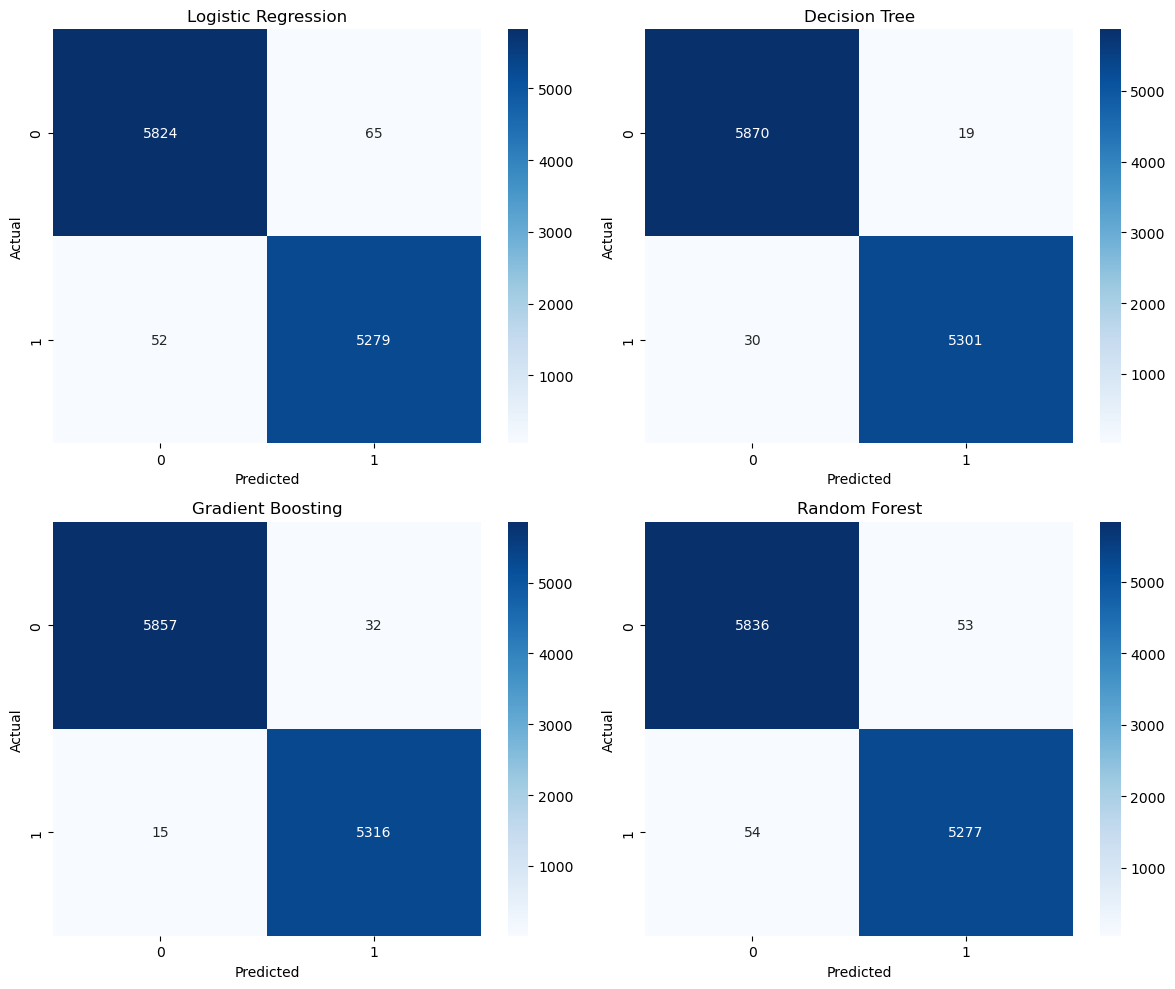

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices
cm_lr = confusion_matrix(y_test, pred_lr)
cm_dt = confusion_matrix(y_test, pred_dt)
cm_gb = confusion_matrix(y_test, pred_gb)
cm_rf = confusion_matrix(y_test, pred_rf)

# Plot confusion matrices
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axs[0, 0])
axs[0, 0].set_title('Logistic Regression')
axs[0, 0].set_xlabel('Predicted')
axs[0, 0].set_ylabel('Actual')

# Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axs[0, 1])
axs[0, 1].set_title('Decision Tree')
axs[0, 1].set_xlabel('Predicted')
axs[0, 1].set_ylabel('Actual')

# Gradient Boosting
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=axs[1, 0])
axs[1, 0].set_title('Gradient Boosting')
axs[1, 0].set_xlabel('Predicted')
axs[1, 0].set_ylabel('Actual')

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axs[1, 1])
axs[1, 1].set_title('Random Forest')
axs[1, 1].set_xlabel('Predicted')
axs[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


## RNN

### Importing necessary modules

This code imports necessary modules from TensorFlow for building and training a deep learning model for text classification. Here's a breakdown of the imports:

1. **Import TensorFlow:**
   - `import tensorflow as tf`: Imports the TensorFlow library for building and training deep learning models.

2. **Import Tokenizer and Pad Sequences:**
   - `from tensorflow.keras.preprocessing.sequence import pad_sequences`: Imports the `pad_sequences` function from `tensorflow.keras.preprocessing.sequence`. This function is used to pad sequences to ensure uniform length.
   - `from tensorflow.keras.preprocessing.text import Tokenizer`: Imports the `Tokenizer` class from `tensorflow.keras.preprocessing.text`. This class is used to tokenize text data into sequences of integers.

3. **Import Sequential Model and Layers:**
   - `from tensorflow.keras.models import Sequential`: Imports the `Sequential` class from `tensorflow.keras.models`. This class allows for building a sequential model where layers are stacked sequentially.
   - `from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout`: Imports various layers such as `Embedding`, `LSTM`, `Bidirectional`, `Dense`, and `Dropout` from `tensorflow.keras.layers`. These layers are building blocks for constructing deep learning models for text classification.

This code sets up the necessary modules and layers to build a deep learning model for text classification using TensorFlow.


In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout


### Tokenizing training text data

This code segment involves tokenizing the training text data using the `Tokenizer` class from TensorFlow. Here's what each line does:

1. **Set Maximum Vocabulary Size:**
   - `max_vocab = 10000`: Defines the maximum vocabulary size to consider during tokenization. This value represents the maximum number of unique words to be considered in the vocabulary.

2. **Instantiate Tokenizer:**
   - `tokenizer = Tokenizer(num_words=max_vocab)`: Instantiates a `Tokenizer` object named `tokenizer`. The parameter `num_words=max_vocab` specifies the maximum number of words to be kept in the vocabulary. Words that are not included in the vocabulary will be ignored during tokenization.

3. **Fit Tokenizer on Training Data:**
   - `tokenizer.fit_on_texts(x_train)`: Fits the `Tokenizer` object (`tokenizer`) to the training text data (`x_train`). This step updates the internal vocabulary based on the text data and assigns a unique integer index to each word in the vocabulary.

By tokenizing the training text data, the `Tokenizer` object prepares the text for further processing and model training, converting each word into a unique integer index based on its frequency in the dataset.


In [37]:
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

### Converting tokenized text sequences into padded sequences

This code segment involves converting the tokenized text sequences into padded sequences suitable for input to a deep learning model. Here's what each line does:

1. **Convert Texts to Sequences:**
   - `x_train_seq = tokenizer.texts_to_sequences(x_train)`: Converts the tokenized training text sequences (`x_train`) into sequences of integer indices using the `texts_to_sequences` method of the `tokenizer` object. Each word in the text is replaced by its corresponding integer index from the tokenizer's vocabulary.
   - `x_test_seq = tokenizer.texts_to_sequences(x_test)`: Converts the tokenized testing text sequences (`x_test`) into sequences of integer indices using the same `texts_to_sequences` method.

2. **Pad Sequences:**
   - `x_train_pad = pad_sequences(x_train_seq, padding='post', maxlen=256)`: Pads the sequences of integer indices in the training set (`x_train_seq`) to ensure uniform length. Sequences shorter than the specified `maxlen` (256) are padded with zeros at the end (`padding='post'`). Longer sequences are truncated to match the `maxlen`.
   - `x_test_pad = pad_sequences(x_test_seq, padding='post', maxlen=256)`: Pads the sequences of integer indices in the testing set (`x_test_seq`) using the same parameters as the training set.

By converting the tokenized text sequences into padded sequences, the data is prepared for input to a deep learning model, ensuring that all input sequences have the same length for efficient processing.


In [38]:
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)
x_train_pad = pad_sequences(x_train_seq, padding='post', maxlen=256)
x_test_pad = pad_sequences(x_test_seq, padding='post', maxlen=256)


### Deep Learning Model Architecture

This code defines a deep learning model architecture using TensorFlow's `Sequential` API. Here's a breakdown of the model layers:

1. **Embedding Layer:**
   - `Embedding(max_vocab, 128)`: Embedding layer with an input dimension of `max_vocab` (maximum vocabulary size) and an output dimension of 128. This layer converts integer-encoded words into dense vectors of fixed size.

2. **Bidirectional LSTM Layers:**
   - `Bidirectional(LSTM(64, return_sequences=True))`: Bidirectional LSTM layer with 64 units and returning sequences. This layer processes the input sequences in both forward and backward directions and outputs sequences for the next layer.
   - `Bidirectional(LSTM(16))`: Bidirectional LSTM layer with 16 units. This layer processes the input sequences in both directions and outputs a single vector for the next layer.

3. **Dense Layers:**
   - `Dense(64, activation='relu')`: Fully connected dense layer with 64 units and ReLU activation function. ReLU (Rectified Linear Unit) introduces non-linearity into the model.
   - `Dropout(0.5)`: Dropout layer with a dropout rate of 0.5. Dropout helps prevent overfitting by randomly dropping a fraction of input units during training.
   - `Dense(1, activation='sigmoid')`: Output dense layer with a single unit and sigmoid activation function. Sigmoid activation is used for binary classification, producing a probability output between 0 and 1.

4. **Model Summary:**
   - `model.summary()`: Prints a summary of the model architecture, including the type and shape of each layer, the number of parameters, and the total number of trainable parameters.

This model architecture consists of embedding, bidirectional LSTM, dense, and dropout layers, designed for text classification tasks.


In [39]:
model = Sequential([
    Embedding(max_vocab, 128),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(16)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 bidirectional (Bidirection  (None, None, 128)         98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 32)                18560     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 

### Training of Deep Learning model using TensorFlow's Keras API

This code block involves training a deep learning model using TensorFlow's Keras API. Here's a breakdown of each part:

1. **Early Stopping Callback:**
   - `early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)`: Configures an early stopping callback. It monitors the validation loss (`val_loss`), waits for one patience epoch before stopping, and restores the best weights when stopping.

2. **Compile the Model:**
   - `model.compile()`: Configures the model for training. The parameters include:
     - `loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)`: Binary crossentropy loss is used for binary classification. `from_logits=True` indicates that the model's output is raw logits.
     - `optimizer=tf.keras.optimizers.Adam(1e-4)`: Adam optimizer with a learning rate of 1e-4.
     - `metrics=['accuracy']`: The accuracy metric is used to monitor the model's performance during training.

3. **Model Training:**
   - `history = model.fit(...)`: Trains the model using the training data (`x_train_pad`, `y_train`). The training is performed for 10 epochs, with a validation split of 0.1, a batch size of 30, and shuffling the data. The early stopping callback is included to stop training if the validation loss does not improve.

4. **Evaluate the Model on Test Data:**
   - `rnn_loss, rnn_accuracy = model.evaluate(x_test_pad, y_test)`: Evaluates the trained model on the test data (`x_test_pad`, `y_test`) and retrieves the loss and accuracy.

5. **Print RNN Model Accuracy:**
   - `print(f"RNN Model Accuracy: {rnn_accuracy}")`: Prints the accuracy of the trained model on the test data.

This code demonstrates the training and evaluation process of the deep learning model for text classification, including the use of early stopping to prevent overfitting.


In [40]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                              patience=1, 
                                              restore_best_weights=True)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(x_train_pad, y_train, 
                    epochs=30, 
                    validation_split=0.1, 
                    batch_size=200, 
                    shuffle=True, 
                    callbacks=[early_stop])

# Evaluate RNN model
rnn_loss, rnn_accuracy = model.evaluate(x_test_pad, y_test)

print(f"RNN Model Accuracy: {rnn_accuracy}")





Epoch 1/30



C:\Users\akash\anaconda3\Lib\site-packages\keras\src\backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



152/152 [==============================] - 322s 2s/step - loss: 0.6262 - accuracy: 0.7229 - val_loss: 0.3636 - val_accuracy: 0.9486
Epoch 2/30
152/152 [==============================] - 373s 2s/step - loss: 0.2115 - accuracy: 0.9457 - val_loss: 0.0976 - val_accuracy: 0.9709
Epoch 3/30
152/152 [==============================] - 375s 2s/step - loss: 0.1053 - accuracy: 0.9745 - val_loss: 0.0738 - val_accuracy: 0.9798
Epoch 4/30
152/152 [==============================] - 392s 3s/step - loss: 0.0648 - accuracy: 0.9868 - val_loss: 0.0657 - val_accuracy: 0.9825
Epoch 5/30
152/152 [==============================] - 338s 2s/step - loss: 0.0466 - accuracy: 0.9914 - val_loss: 0.0455 - val_accuracy: 0.9884
Epoch 6/30
152/152 [==============================] - 312s 2s/step - loss: 0.0322 - accuracy: 0.9946 - val_loss: 0.0381 - val_accuracy: 0.9893
Epoch 7/30
351/351 [==============================] - 26s 75ms/step - loss: 0.0485 - accuracy: 0.9881
RNN Model Accuracy: 0.988057017326355


### Predict_rnn Function

This code defines a function `predict_rnn(news)` that takes a news article as input and predicts its sentiment using the trained deep learning model. Here's the breakdown of the function:

1. **Import pandas:**
   - `import pandas as pd`: Imports the pandas library for data manipulation.

2. **Define `predict_rnn` Function:**
   - `def predict_rnn(news):`: Defines a function named `predict_rnn` that takes a single argument `news`, representing the news article to be predicted.

3. **Tokenize and Pad the Input News:**
   - `new_seq = tokenizer.texts_to_sequences([news])`: Tokenizes the input news article (`news`) using the tokenizer object (`tokenizer`). The article is converted into a sequence of integer indices.
   - `padded_seq = pad_sequences(new_seq, padding='post', maxlen=256)`: Pads the tokenized sequence (`new_seq`) to ensure a fixed length of 256 tokens. This is done to match the input shape expected by the deep learning model.

4. **Make Prediction:**
   - `prediction = model.predict(padded_seq)`: Uses the trained deep learning model (`model`) to predict the sentiment of the padded sequence (`padded_seq`). The prediction is stored in the variable `prediction`.

5. **Return Prediction:**
   - `return int(prediction[0][0])`: Returns the predicted sentiment as an integer value. Since the model outputs probabilities, the predicted probability of sentiment is converted to an integer representing the sentiment class (e.g., 0 for negative sentiment, 1 for positive sentiment).

This function encapsulates the process of predicting the sentiment of a news article using the trained deep learning model, making it easier to perform predictions on new data.


In [41]:
import pandas as pd

def predict_rnn(news):
    new_seq = tokenizer.texts_to_sequences([news])
    padded_seq = pad_sequences(new_seq, padding='post', maxlen=256)
    prediction = model.predict(padded_seq)
    return int(prediction[0][0])


### RNN Evaluation

This code segment involves plotting the training and validation loss, as well as the training and validation accuracy over epochs during the model training process. Here's a breakdown of each part:

1. **Plot Training and Validation Loss:**
   - `plt.plot(history.history['loss'], label='Training Loss')`: Plots the training loss values stored in the `history` object over epochs and labels it as "Training Loss".
   - `plt.plot(history.history['val_loss'], label='Validation Loss')`: Plots the validation loss values stored in the `history` object over epochs and labels it as "Validation Loss".
   - `plt.title('Training and Validation Loss')`: Sets the title of the plot as "Training and Validation Loss".
   - `plt.xlabel('Epoch')`: Labels the x-axis as "Epoch".
   - `plt.ylabel('Loss')`: Labels the y-axis as "Loss".
   - `plt.legend()`: Displays a legend to differentiate between training and validation loss lines.
   - `plt.show()`: Shows the plot.

2. **Plot Training and Validation Accuracy:**
   - `plt.plot(history.history['accuracy'], label='Training Accuracy')`: Plots the training accuracy values stored in the `history` object over epochs and labels it as "Training Accuracy".
   - `plt.plot(history.history['val_accuracy'], label='Validation Accuracy')`: Plots the validation accuracy values stored in the `history` object over epochs and labels it as "Validation Accuracy".
   - `plt.title('Training and Validation Accuracy')`: Sets the title of the plot as "Training and Validation Accuracy".
   - `plt.xlabel('Epoch')`: Labels the x-axis as "Epoch".
   - `plt.ylabel('Accuracy')`: Labels the y-axis as "Accuracy".
   - `plt.legend()`: Displays a legend to differentiate between training and validation accuracy lines.
   - `plt.show()`: Shows the plot.

These plots provide insights into the training process of the deep learning model, showing how the loss and accuracy metrics change over epochs for both the training and validation datasets.


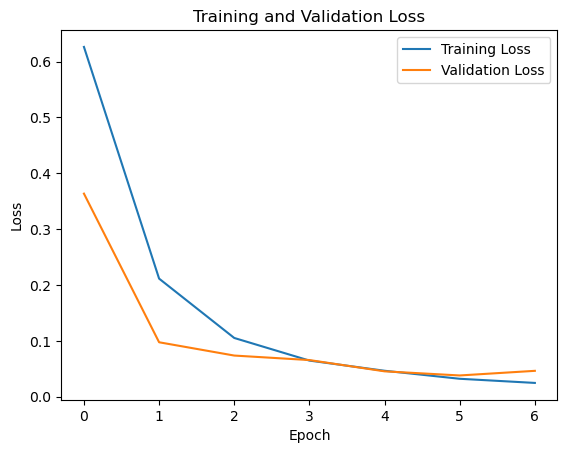

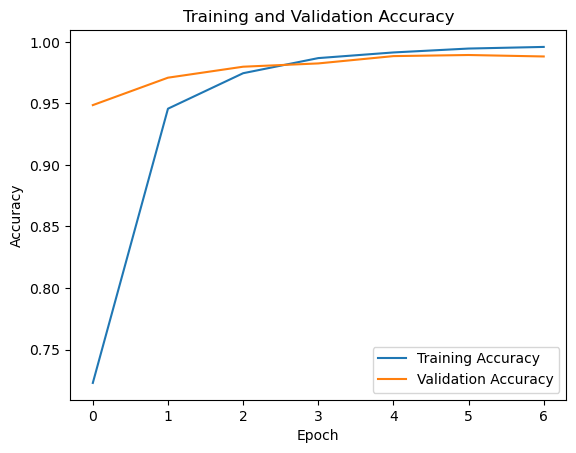

In [42]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## BERT Model

### Importing Libraries

This code block imports various libraries and modules necessary for text preprocessing, machine learning model training, evaluation, and visualization. Here's a breakdown of each import statement:

1. **Text Preprocessing Libraries:**
   - `import string`: Imports the `string` module for string manipulation, including operations on characters and punctuation.
   - `import re`: Imports the `re` module for regular expressions, used for text cleaning and pattern matching.
   - `from nltk.corpus import stopwords`: Imports the `stopwords` corpus from NLTK, which contains common English stopwords.
   - `from nltk.tokenize import word_tokenize`: Imports the `word_tokenize` function from NLTK, used for tokenizing text into words.
   - `from nltk.stem import WordNetLemmatizer`: Imports the `WordNetLemmatizer` class from NLTK, used for lemmatization of words.

2. **Machine Learning and Transformers Libraries:**
   - `from sklearn.model_selection import train_test_split`: Imports the `train_test_split` function from scikit-learn, used for splitting data into training and testing sets.
   - `from sklearn.metrics import accuracy_score`: Imports the `accuracy_score` function from scikit-learn, used for evaluating model accuracy.
   - `from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments`: Imports various classes and functions from the Transformers library for natural language processing tasks. Specifically, it imports classes related to BERT model, tokenizer, trainer, and training arguments.

3. **Other Libraries:**
   - `import torch`: Imports the PyTorch library, used for tensor computations and deep learning.
   - `import pandas as pd`: Imports the pandas library for data manipulation and analysis.
   - `import time`: Imports the `time` module for measuring time duration during code execution.
   - `from transformers.trainer_callback import TrainerCallback`: Imports the `TrainerCallback` class from Transformers library for defining custom callbacks during training.
   - `import matplotlib.pyplot as plt`: Imports the `matplotlib.pyplot` module for plotting graphs and visualizations.
   - `import numpy as np`: Imports the NumPy library for numerical computations.

These libraries and modules provide the necessary functionality for text preprocessing, model training, evaluation, and visualization in natural language processing tasks.


In [43]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
import pandas as pd
import time
from transformers.trainer_callback import TrainerCallback
import matplotlib.pyplot as plt
import numpy as np

### BERT model

This code block performs the following tasks:

1. **Preprocess the Text Data:**
   - The text data in the 'text' column of the dataframe `data` is preprocessed using the `preprocess_text` function, which was defined earlier. The preprocessing involves converting text to lowercase, removing special characters, URLs, HTML tags, punctuation, stop words, and lemmatization.

2. **Split the Dataset into Train and Test Sets with a Sample Size:**
   - Randomly samples `sample_size` rows from the preprocessed data (`data`) to create a smaller dataset named `sampled_data`.
   - Splits the sampled data into training and testing sets (`x_train`, `x_test`, `y_train`, `y_test`) using `train_test_split` from scikit-learn.

3. **Define the BERT Tokenizer and Model:**
   - Initializes the BERT tokenizer and model using `BertTokenizer.from_pretrained` and `BertForSequenceClassification.from_pretrained` from the Transformers library, respectively.

4. **Tokenize the Text Data:**
   - Tokenizes the text data (`x_train` and `x_test`) using the BERT tokenizer, specifying truncation and padding to ensure uniform length.

5. **Prepare the Datasets:**
   - Defines a custom dataset class `NewsDataset` to prepare the training and testing datasets with encoded inputs and labels.

6. **Training Arguments:**
   - Defines training arguments with minimal settings using `TrainingArguments`, specifying the output directory, number of training epochs, batch sizes, warmup steps, and logging settings.

7. **Define Custom Training Progress Callback:**
   - Defines a custom callback class `TrainingProgressCallback` to log training progress during training.

8. **Trainer Initialization:**
   - Initializes a Trainer object `trainer` with the BERT model, training arguments, train dataset, evaluation dataset, and custom callback.

9. **Training the Model:**
   - Trains the BERT model using the Trainer object `trainer`.

10. **Measure Training and Evaluation Time:**
    - Measures the time taken for training and evaluation.

11. **Evaluate Model Accuracy:**
    - Calculates the accuracy of the trained BERT model on the test dataset.

12. **Print Results:**
    - Prints the accuracy, training time, and evaluation time.

This code demonstrates the process of preprocessing text data, training a BERT model for sequence classification, and evaluating its performance.


In [44]:
# Preprocess the text data
data['text'] = data['text'].apply(preprocess_text)

# Split the dataset into train and test 
sample_size = 500  
sampled_data = data.sample(n=sample_size, random_state=42)  

x = sampled_data['text']
y = sampled_data['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Define the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize the text data
train_encodings = tokenizer(x_train.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(x_test.tolist(), truncation=True, padding=True)

# Prepare the datasets
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create train and test datasets using encoded inputs and labels
train_dataset = NewsDataset(train_encodings, y_train.tolist())
test_dataset = NewsDataset(test_encodings, y_test.tolist())

# Training arguments with minimal settings
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,  
    per_device_train_batch_size=10,  
    per_device_eval_batch_size=10,  
    warmup_steps=30,  
    logging_dir='./logs',
    logging_steps= 5  
)

# Define a custom callback to log training progress
# Define a custom callback to log training progress
class TrainingProgressCallback(TrainerCallback):
    def __init__(self):
        super().__init__()
        self.train_loss_values = []

    def on_train_begin(self, args, state, control, **kwargs):
        print("Training started...")

    def on_train_batch_end(self, args, state, control, **kwargs):
        # Log training loss
        if 'loss' in state.log_history[-1]:
            loss = state.log_history[-1]['loss']
            self.train_loss_values.append(loss)
            if state.global_step % args.logging_steps == 0:
                print(f"Step {state.global_step}/{args.num_train_steps}, Loss: {loss:.4f}")



# Trainer to train the model with the adjusted settings and data
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[TrainingProgressCallback()]
)

# Measure time taken for training
start_time = time.time()
trainer.train()
training_time = time.time() - start_time

# Measure time taken for evaluation
start_time = time.time()
predictions = trainer.predict(test_dataset)
eval_time = time.time() - start_time

pred_labels = predictions.predictions.argmax(-1)
accuracy = accuracy_score(y_test, pred_labels)
print(f"Accuracy: {accuracy}")
print(f"Evaluation Time: {eval_time} seconds")





Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training started...


Step,Training Loss
5,0.710900
10,0.642600
15,0.554500
20,0.468700
25,0.299300
30,0.308100
35,0.133900
40,0.101800
45,0.071400
50,0.097000


Accuracy: 1.0
Evaluation Time: 229.465567111969 seconds


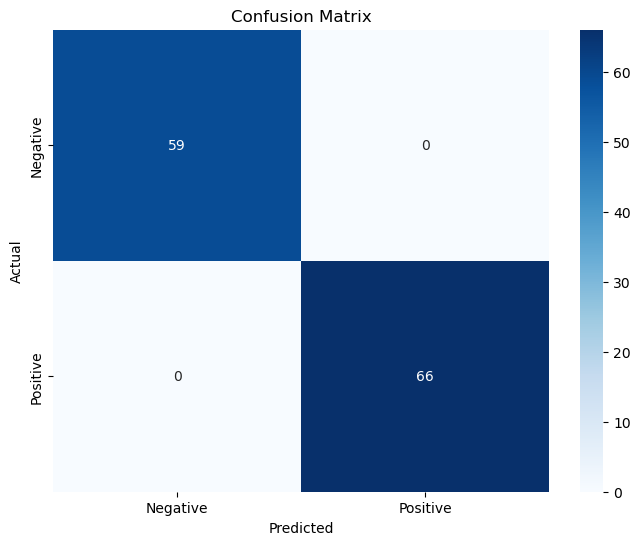

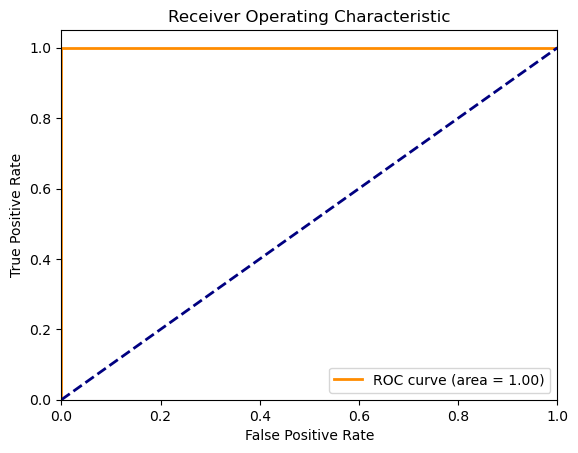

In [45]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, pred_labels)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



## Confidence Score Generator

### Confidence score generator with news input

This code defines a function `fakenewsdetection(news)` for detecting fake news using multiple machine learning models, including Logistic Regression, Decision Tree, Gradient Boosting, Random Forest, a custom RNN model, and a BERT model. Here's a breakdown of the function:

1. **Output Label Function:**
   - `output_label(n)`: Defines a function to convert model predictions (0 or 1) into human-readable labels indicating whether the news is fake or not.

2. **Fakenewsdetection Function:**
   - `fakenewsdetection(news)`: Takes a news article as input and performs the following steps:
     - Preprocesses the input news text using the `preprocess_text` function.
     - Tokenizes the preprocessed news text using the BERT tokenizer.
     - Makes predictions using Logistic Regression, Decision Tree, Gradient Boosting, Random Forest, a custom RNN model, and a BERT model.
     - Aggregates predictions from all models and calculates a confidence score based on the percentage of models agreeing on the prediction.
     - Outputs the predictions and confidence score.

3. **User Input:**
   - Prompts the user to input a news article.

4. **Call to Fakenewsdetection Function:**
   - Calls the `fakenewsdetection` function with the user input news article.

This function integrates multiple machine learning models to provide predictions on whether the input news article is fake or not, along with a confidence score based on model agreement.


In [47]:
def output_label(n):
    if n == 0:
        return "This is a fake news"
    elif n == 1:
        return "This is not a fake news"


# Define the fakenewsdetection function
def fakenewsdetection(news):
    # Preprocess the input news text
    processed_news = preprocess_text(news)
    
    # Tokenize the input news text using BERT tokenizer
    inputs = tokenizer(processed_news, return_tensors="pt", max_length=256, truncation=True)
    
    # Predictions using Logistic Regression
    pred_lr = LR_model.predict(vectorization.transform([processed_news]))[0]
    
    # Predictions using Decision Tree
    pred_dt = DT_model.predict(vectorization.transform([processed_news]))[0]
    
    # Predictions using Gradient Boosting
    pred_gb = GB_model.predict(vectorization.transform([processed_news]))[0]
    
    # Predictions using Random Forest
    pred_rf = RF_model.predict(vectorization.transform([processed_news]))[0]
    
    # Predictions using RNN model
    rnn_pred = model(inputs.input_ids)[0][0].detach().cpu().numpy()
    pred_rnn = 1 if any(rnn_pred >= 0.5) else 0
    
    # Predictions using BERT model
    with torch.no_grad():
        bert_outputs = model(**inputs)
    bert_probabilities = torch.softmax(bert_outputs.logits, dim=1)
    bert_pred = torch.argmax(bert_probabilities, dim=1).item()
    
    # Aggregate predictions
    predictions = [pred_lr, pred_dt, pred_gb, pred_rf, pred_rnn, bert_pred]
    
    # Calculate confidence score
    fake_count = predictions.count(0)
    not_fake_count = predictions.count(1)
    confidence_score = max(fake_count, not_fake_count) / len(predictions) * 100
    
    # Output predictions
    print("\n\nLR Prediction: {}\nDT Prediction: {}\nGB Prediction: {}\nRF Prediction: {}\nRNN Prediction: {}\nBERT Prediction: {}".format(
        output_label(pred_lr),
        output_label(pred_dt),
        output_label(pred_gb),
        output_label(pred_rf),
        output_label(pred_rnn),
        output_label(bert_pred)
    ))

    print("Confidence Score (Based on models agreeing): {:.2f}%".format(confidence_score))

# Get user input
user_input = input("Please paste your news here: ")

# Call the fakenewsdetection function with user input
fakenewsdetection(user_input)





Please paste your news here: Trump is president


LR Prediction: This is a fake news
DT Prediction: This is a fake news
GB Prediction: This is a fake news
RF Prediction: This is a fake news
RNN Prediction: This is not a fake news
BERT Prediction: This is a fake news
Confidence Score (Based on models agreeing): 83.33%
